# Uniformly partitioned convolution algorithm

The flowing image is from [Partitioned convolution algorithms for real-time auralization](https://www.researchgate.net/publication/280979094_Partitioned_convolution_algorithms_for_real-time_auralization) Figure.5.2
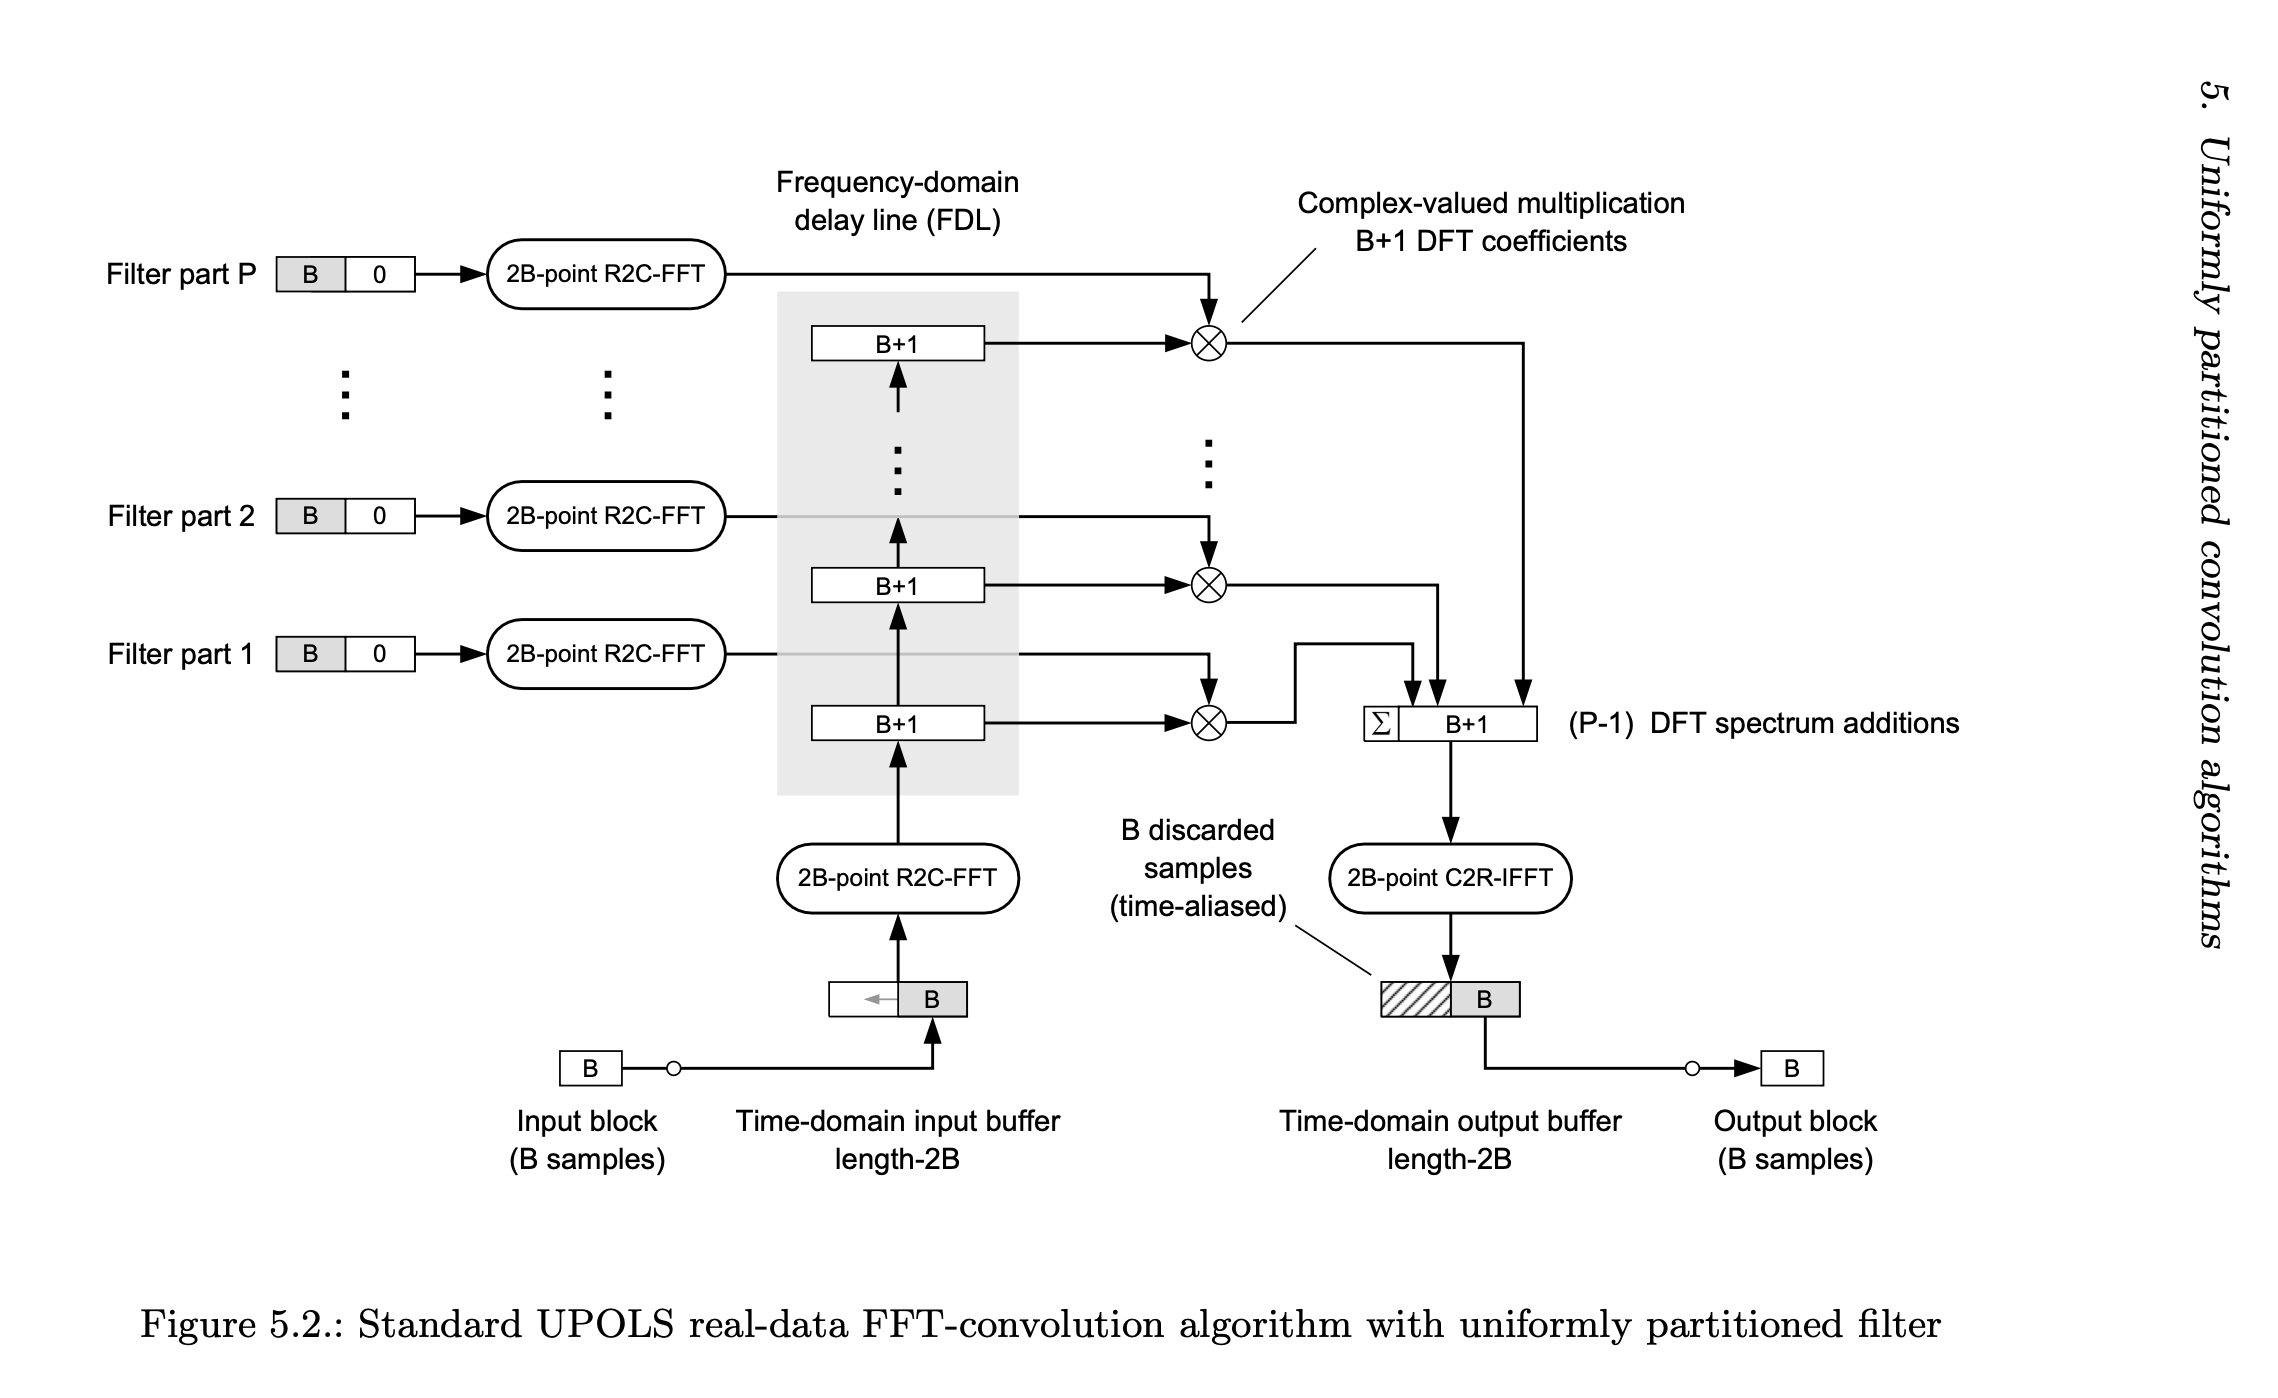

**Here is a simple example to show how this algorith works**

In [1]:
import numpy as np

def pad_zeros_to(x, new_length):
    """Append new_length - x.shape[0] zeros to x's end via copy."""
    output = np.zeros((new_length,))
    output[:x.shape[0]] = x
    return output

In [11]:
x = np.arange(12)
h = np.arange(12)
B = 4

print('x :', x)
print('h :', h)
print('B :', B)
print('convulotion:', np.convolve(x, h))

x : [ 0  1  2  3  4  5  6  7  8  9 10 11]
h : [ 0  1  2  3  4  5  6  7  8  9 10 11]
B : 4
convulotion: [  0   0   1   4  10  20  35  56  84 120 165 220 286 340 381 408 420 416
 395 356 298 220 121]


First, splits h into sub filters. 

The number of sub filters is $P = N / B$, $N$ is x.size.

Because h is all ones in this example, so all sub filters all ones too.

In [12]:
h0 = np.array([0,1,2,3])
h1 = np.array([4,5,6,7])
h2 = np.array([8,9,10,11])

Then we pad zeros to sub filters, and make sub filters' size to 2*B

In [13]:
h0_pad = pad_zeros_to(h0, 2*B)
h1_pad = pad_zeros_to(h1, 2*B)
h2_pad = pad_zeros_to(h2, 2*B)

We can precalculate fft of sub filters

In [14]:
h0_fft = np.fft.fft(h0_pad)
h1_fft = np.fft.fft(h1_pad)
h2_fft = np.fft.fft(h2_pad)

Now, let's input block and show how algorithm works

In [15]:
xw = np.zeros(2*B)
block_i = 0
block_x = x[block_i*B:block_i*B + B]
xw = np.roll(xw, -B)
xw[-B:] = block_x
xw_fft_0 = np.fft.fft(xw)

s = xw_fft_0*h0_fft + 0*h1_fft + 0*h2_fft
output = np.fft.ifft(s).real
print(output[-B:])

[0. 0. 1. 4.]


In [16]:
block_i = 1
block_x = x[block_i*B:block_i*B + B]
xw = np.roll(xw, -B)
xw[-B:] = block_x
xw_fft_1 = np.fft.fft(xw)

s = xw_fft_1*h0_fft + xw_fft_0*h1_fft + 0*h2_fft
output = np.fft.ifft(s).real
output[-B:]

array([10., 20., 35., 56.])

In [17]:
block_i = 2
block_x = x[block_i*B:block_i*B + B]
xw = np.roll(xw, -B)
xw[-B:] = block_x
xw_fft_2 = np.fft.fft(xw)

s = xw_fft_2*h0_fft + xw_fft_1*h1_fft + xw_fft_0*h2_fft
output = np.fft.ifft(s).real
output[-B:]

array([ 84., 120., 165., 220.])